In [1]:
import torch
import math
from collections import OrderedDict
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
print(math.tanh(-2.2))
print(math.tanh(0.1))
print(math.tanh(2.5))

-0.9757431300314515
0.09966799462495582
0.9866142981514303


In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape

torch.Size([11, 1])

In [3]:
t_u_train, t_u_val, t_c_train, t_c_val = train_test_split(t_u, t_c, test_size=0.2, random_state=42)
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [4]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
linear_model.parameters(),
lr=1e-2)

In [5]:
linear_model.parameters()

<generator object Module.parameters at 0x000001FEBE842120>

In [6]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4892]], requires_grad=True),
 Parameter containing:
 tensor([0.8804], requires_grad=True)]

In [7]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
    t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")

In [8]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
training_loop(
n_epochs = 3000,
optimizer = optimizer,
model = linear_model,
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)
print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 133.1447, Validation loss 34.5686
Epoch 1000, Training loss 3.3651, Validation loss 6.2633
Epoch 2000, Training loss 2.8233, Validation loss 4.6324
Epoch 3000, Training loss 2.8118, Validation loss 4.4362

Parameter containing:
tensor([[5.3102]], requires_grad=True)
Parameter containing:
tensor([-16.4423], requires_grad=True)


In [9]:
seq_model = nn.Sequential(
nn.Linear(1, 13),
nn.Tanh(),
nn.Linear(13, 1))

In [10]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [11]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [12]:
seq_model = nn.Sequential(OrderedDict([
('hidden_linear', nn.Linear(1, 8)),
('hidden_activation', nn.Tanh()),
('output_linear', nn.Linear(8, 1))
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [13]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)
seq_model.output_linear.bias

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


Parameter containing:
tensor([0.1347], requires_grad=True)

In [15]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)
print('output', seq_model(t_u_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 254.0950, Validation loss 92.9544
Epoch 1000, Training loss 4.3497, Validation loss 3.5459
Epoch 2000, Training loss 3.1925, Validation loss 7.6381
Epoch 3000, Training loss 2.0900, Validation loss 6.1054
Epoch 4000, Training loss 1.6131, Validation loss 4.9994
Epoch 5000, Training loss 1.3898, Validation loss 4.2082
output tensor([[30.7879],
        [30.7879],
        [30.7879]], grad_fn=<AddmmBackward0>)
answer tensor([[ 8.0000],
        [ 0.5000],
        [13.0000]])
hidden tensor([[ 0.2913],
        [ 0.1996],
        [-1.1620],
        [-5.5548],
        [ 5.7622],
        [-1.0093],
        [-6.1349],
        [ 0.0613]])


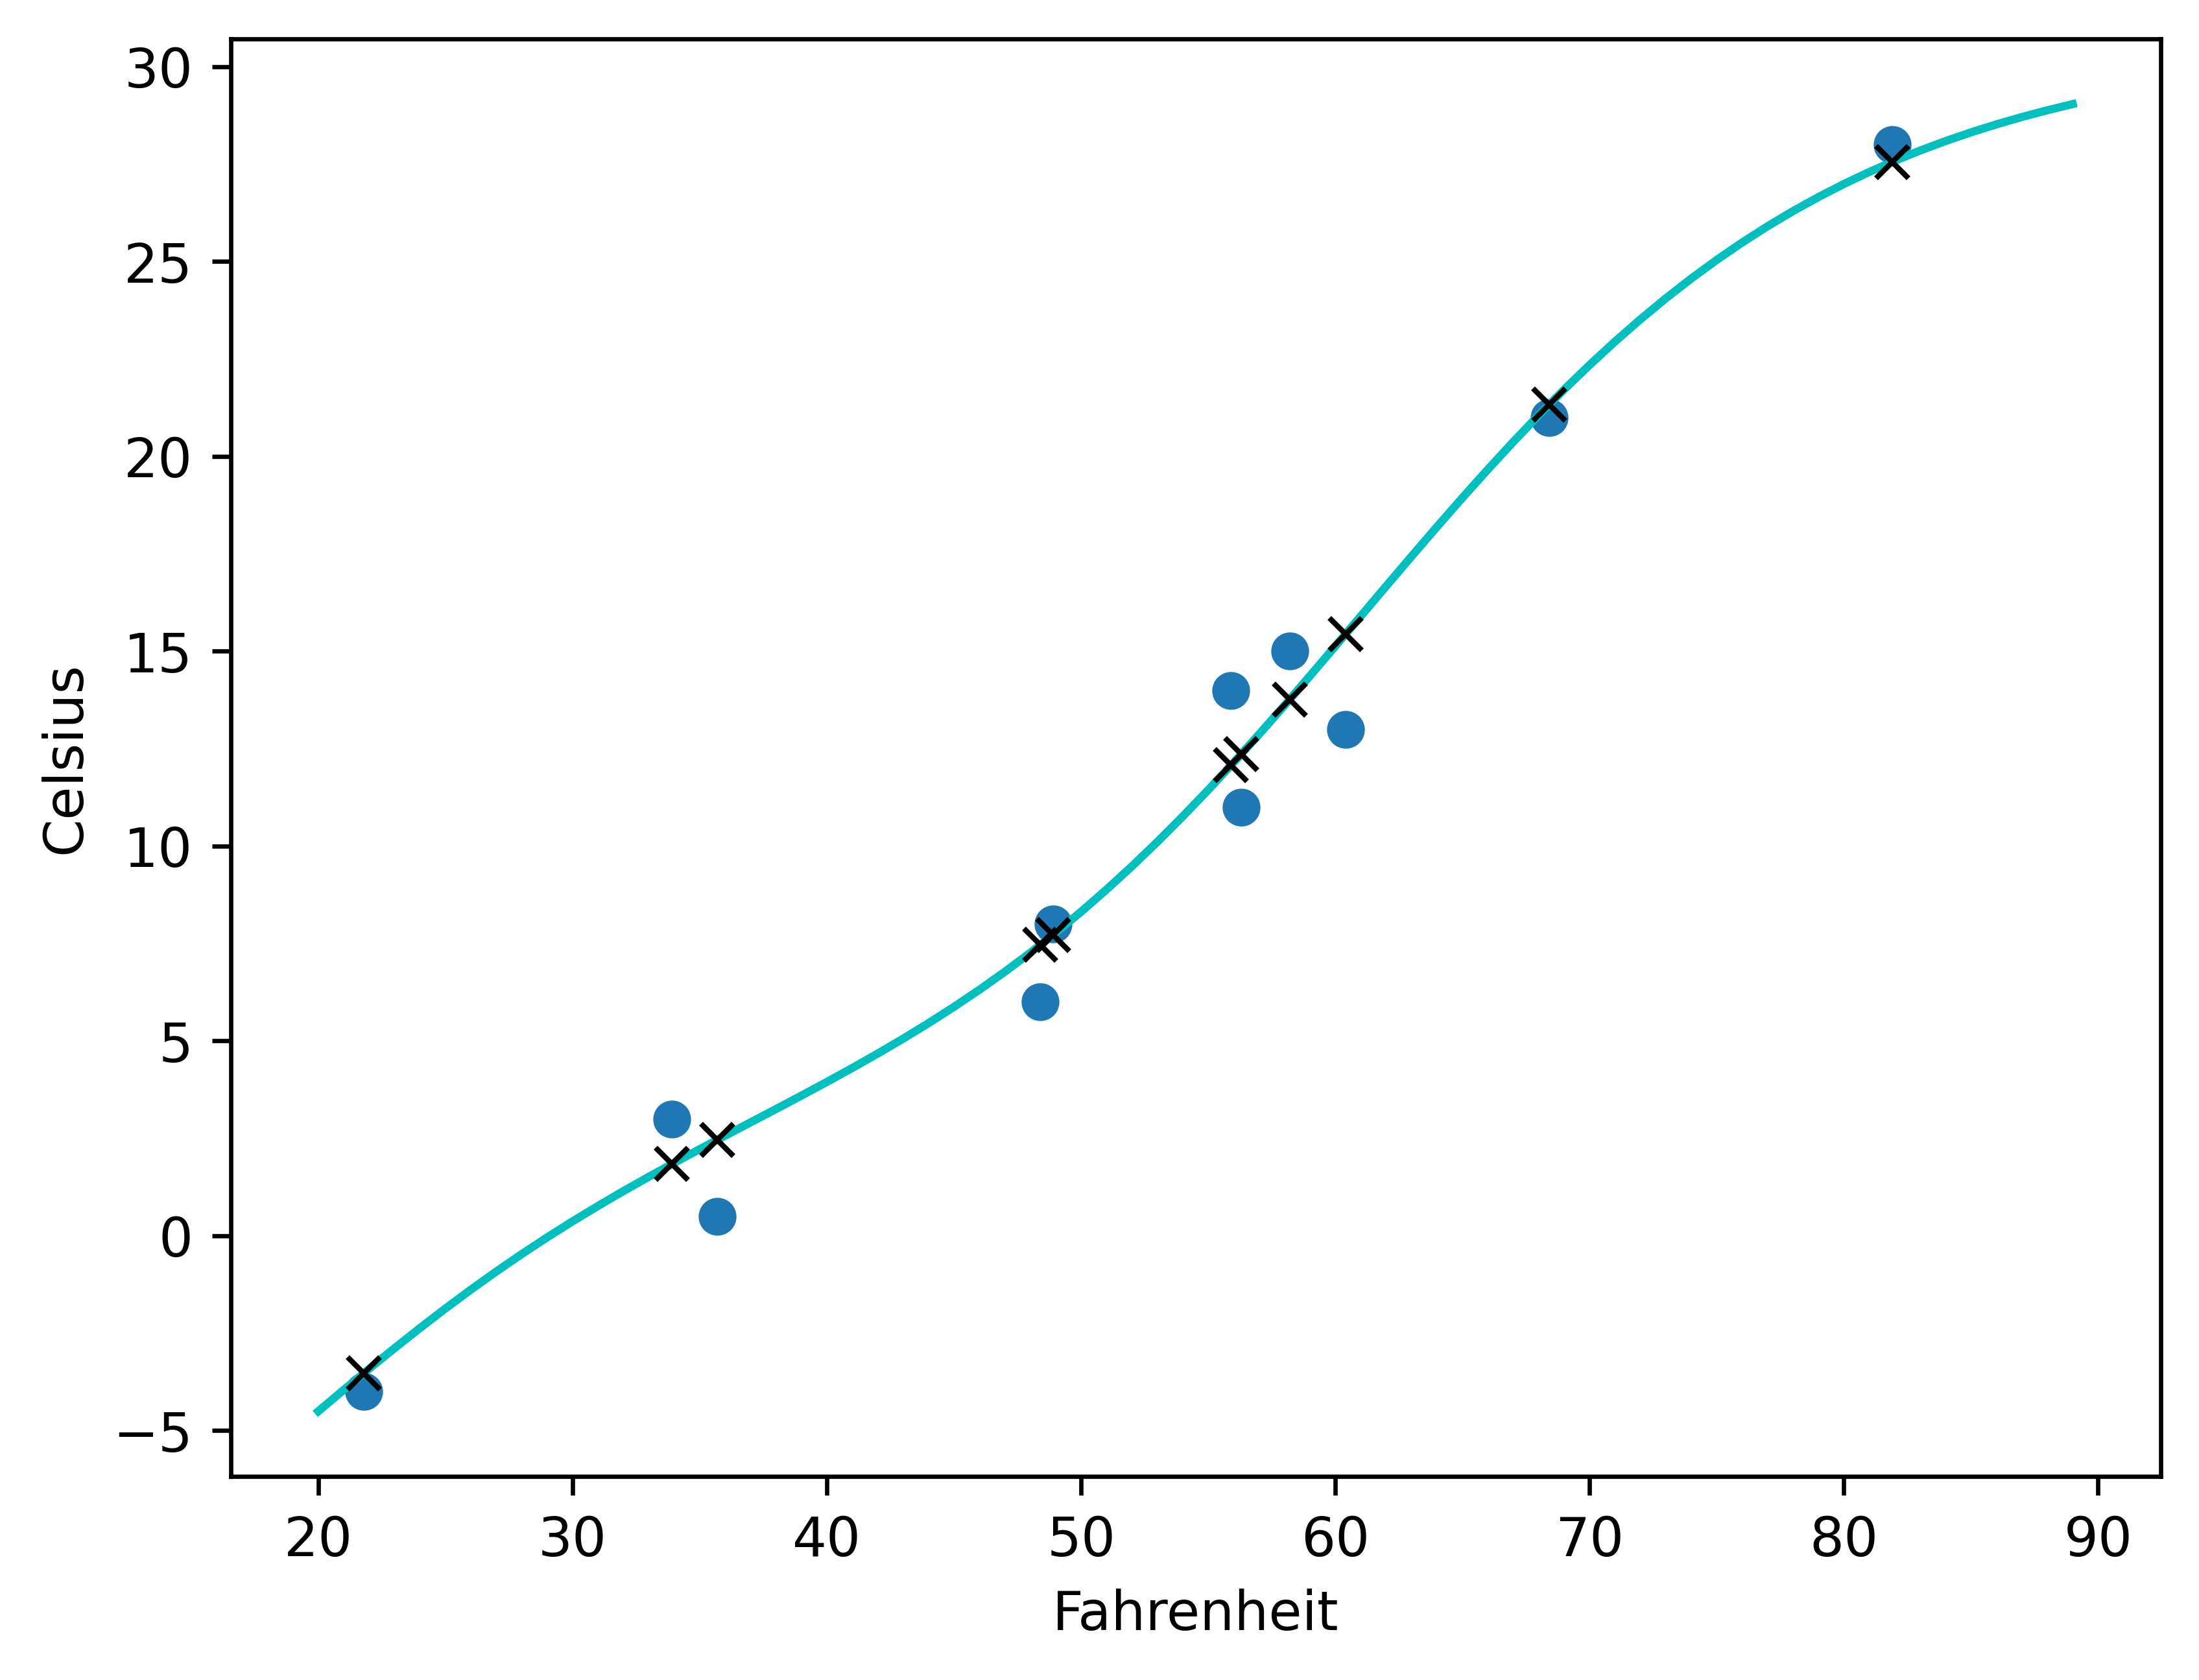

In [16]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')